In [143]:
#Importing Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [144]:
#Import the dataset which is csv file

dataset = pd.read_csv(
    r"C:\Users\HP\Downloads\Crop-yield-prediction-using-weather-data-and-NDVI-time-series-main\maharashtra_Rice_CropR1.csv"
) 

In [145]:
print(dataset.columns)


Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Rainfall', 'MaxTemp', 'Production', 'Productivity'],
      dtype='object')


In [146]:
#View the dataset
dataset

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Rainfall,MaxTemp,Production,Productivity
0,Maharashtra,AHMEDNAGAR,1997,Kharif,Rice,5900,372.8,31.96,7200,1.22
1,Maharashtra,AKOLA,1997,Kharif,Rice,2900,587.0,32.79,1600,0.55
2,Maharashtra,AMRAVATI,1997,Kharif,Rice,9500,836.3,33.15,5800,0.61
3,Maharashtra,AURANGABAD,1997,Kharif,Rice,1100,751.3,32.86,1200,1.09
4,Maharashtra,BEED,1997,Kharif,Rice,3400,764.1,33.20,1700,0.50
...,...,...,...,...,...,...,...,...,...,...
921,Maharashtra,SOLAPUR,2019,Kharif,Rice,400,454.6,32.61,100,0.25
922,Maharashtra,THANE,2019,Kharif,Rice,137500,2192.9,31.55,356800,2.59
923,Maharashtra,WARDHA,2019,Kharif,Rice,19400,890.7,33.45,31700,1.63
924,Maharashtra,WASHIM,2019,Kharif,Rice,2000,567.9,33.90,800,0.40


In [147]:
#Shape of dataset : cotains 926 rows and 10 columns
dataset.shape

(926, 10)

In [148]:
# Target (Yield)
y = dataset['Productivity'].values

# Features
X = dataset.drop('Productivity', axis=1)


# Part 1:Preprocessing Stage

In [149]:
dataset=dataset.drop(['State_Name','Crop'],axis=1)

In [150]:
dataset

,District_Name,Crop_Year,Season,Area,Rainfall,MaxTemp,Production,Productivity
0,AHMEDNAGAR,1997,Kharif,5900,372.8,31.96,7200,1.22
1,AKOLA,1997,Kharif,2900,587.0,32.79,1600,0.55
2,AMRAVATI,1997,Kharif,9500,836.3,33.15,5800,0.61
3,AURANGABAD,1997,Kharif,1100,751.3,32.86,1200,1.09
4,BEED,1997,Kharif,3400,764.1,33.20,1700,0.50
...,...,...,...,...,...,...,...,...
921,SOLAPUR,2019,Kharif,400,454.6,32.61,100,0.25
922,THANE,2019,Kharif,137500,2192.9,31.55,356800,2.59
923,WARDHA,2019,Kharif,19400,890.7,33.45,31700,1.63
924,WASHIM,2019,Kharif,2000,567.9,33.90,800,0.40


In [151]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 926 entries, 0 to 925
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   District_Name  926 non-null    object 
 1   Crop_Year      926 non-null    int64  
 2   Season         926 non-null    object 
 3   Area           926 non-null    int64  
 4   Rainfall       926 non-null    float64
 5   MaxTemp        926 non-null    float64
 6   Production     926 non-null    int64  
 7   Productivity   926 non-null    float64
dtypes: float64(3), int64(3), object(2)
memory usage: 58.0+ KB


In [152]:
print(dataset['District_Name'].unique())

['AHMEDNAGAR' 'AKOLA' 'AMRAVATI' 'AURANGABAD' 'BEED' 'BHANDARA' 'BULDHANA'
 'CHANDRAPUR' 'DHULE' 'GADCHIROLI' 'GONDIA' 'HINGOLI' 'JALGAON' 'JALNA'
 'KOLHAPUR' 'LATUR' 'NAGPUR' 'NANDED' 'NANDURBAR' 'NASHIK' 'OSMANABAD'
 'PALGHAR' 'PARBHANI' 'PUNE' 'RAIGAD' 'RATNAGIRI' 'SANGLI' 'SATARA'
 'SINDHUDURG' 'SOLAPUR' 'THANE' 'WARDHA' 'WASHIM' 'YAVATMAL']


In [153]:
#Visualizing the dataset

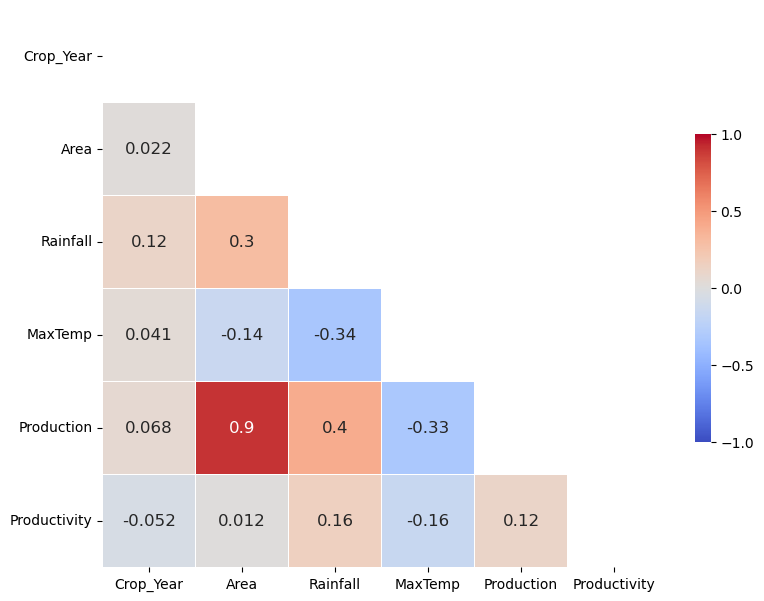

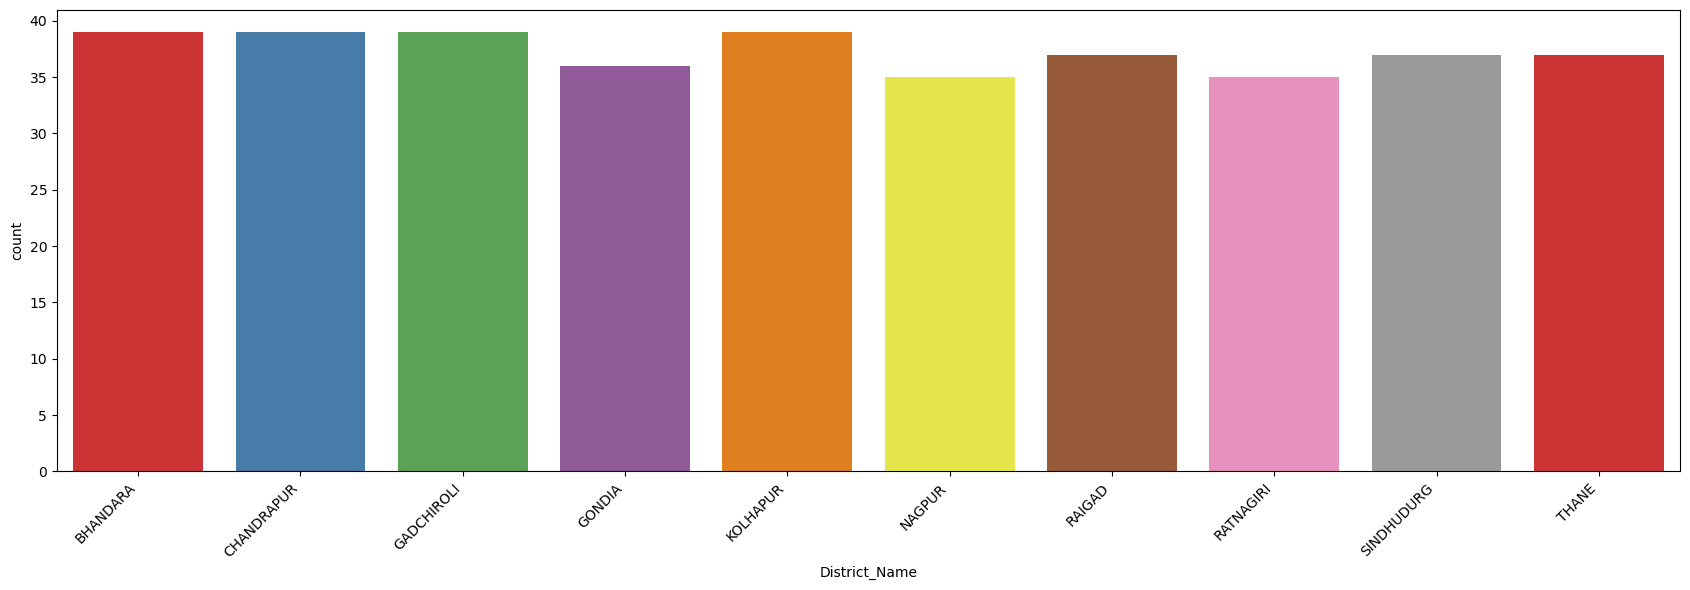

In [154]:
# plt.figure(figsize=(17,6), dpi = 100)
# chart=sns.countplot(x='District_Name',data=dataset,palette='Set1')
# plt.xlabel('District_Name')
# chart.set_xticklabels(chart.get_xticklabels(), rotation=45,horizontalalignment='right',fontweight='light',
#     fontsize='x-large')
# plt.title("Record Count in Maharastra per Year from 1997 to 2019", fontsize=17)
# plt.tight_layout()

top_districts = dataset['District_Name'].value_counts().head(10).index

plt.figure(figsize=(17, 6), dpi=100)
sns.countplot(
    x='District_Name',
    data=dataset[dataset['District_Name'].isin(top_districts)],
    hue='District_Name',
    palette='Set1',
    legend=False
)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


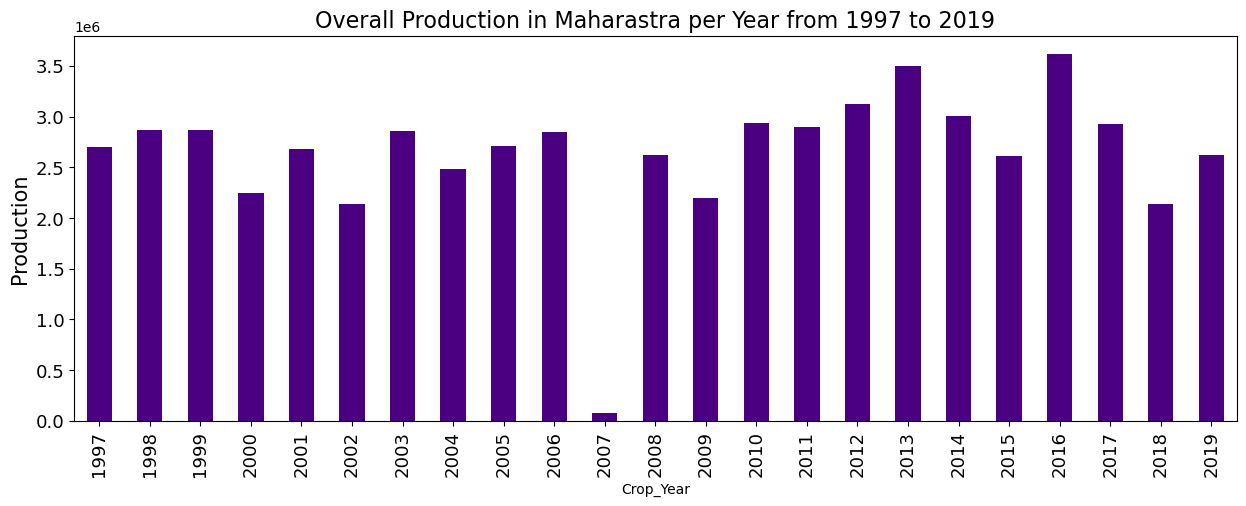

In [155]:
by_year = dataset.groupby('Crop_Year')['Production'].sum()
# Plotting the bars

ax = by_year.plot(kind='bar', figsize=(15,5), color="indigo", fontsize=13)
ax.set_alpha(0.8)
ax.set_title("Overall Production in Maharastra per Year from 1997 to 2019", fontsize=16)
ax.set_ylabel("Production", fontsize=15)
plt.show()

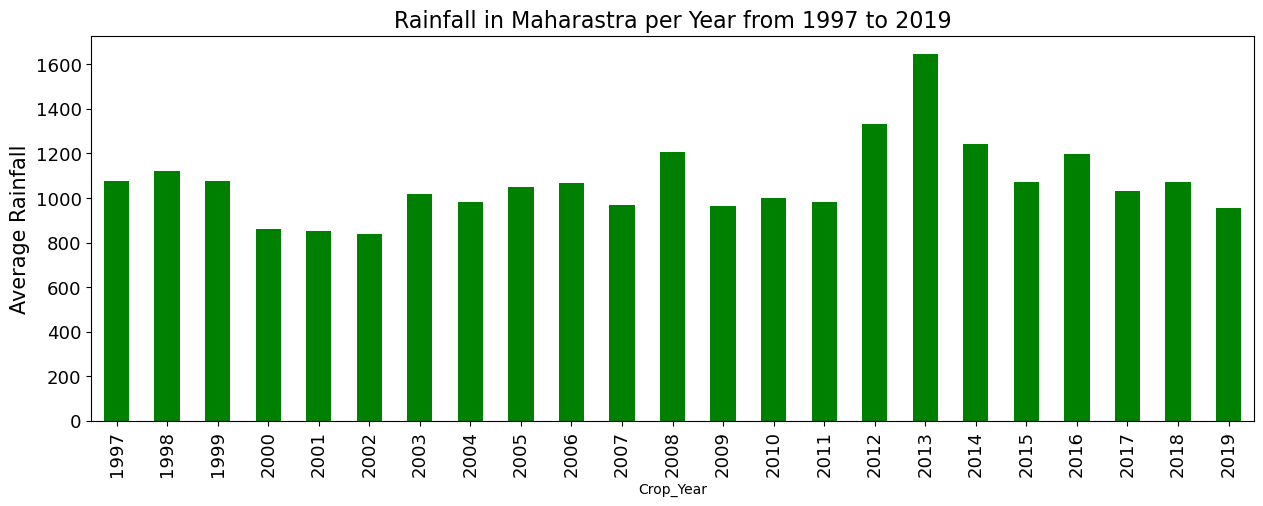

In [156]:
by_year = dataset.groupby('Crop_Year')['Rainfall'].mean()
# Plotting the bars

ax = by_year.plot(kind='bar', figsize=(15,5), color="green", fontsize=13)
ax.set_alpha(0.8)
ax.set_title("Rainfall in Maharastra per Year from 1997 to 2019", fontsize=16)
ax.set_ylabel("Average Rainfall", fontsize=15)
plt.show()

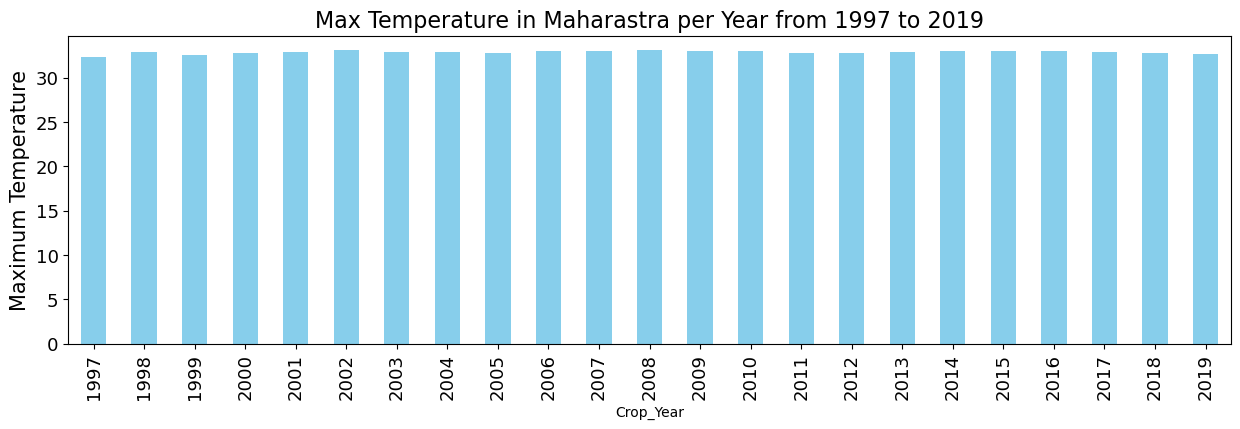

In [157]:
by_year = dataset.groupby('Crop_Year')['MaxTemp'].mean()
# Plotting the bars

ax = by_year.plot(kind='bar', figsize=(15,4), color="skyblue", fontsize=13)
ax.set_alpha(0.8)
ax.set_title("Max Temperature in Maharastra per Year from 1997 to 2019", fontsize=16)
ax.set_ylabel("Maximum Temperature", fontsize=15)
plt.show()

In [158]:
#Creating the correlation matrix for the features
corr_matrix = dataset.corr(numeric_only=True)

corr_matrix

,Crop_Year,Area,Rainfall,MaxTemp,Production,Productivity
Crop_Year,1.000000,0.022331,0.115690,0.041494,0.068377,-0.051912
Area,0.022331,1.000000,0.302188,-0.141118,0.902099,0.012380
Rainfall,0.115690,0.302188,1.000000,-0.340644,0.402226,0.155090
MaxTemp,0.041494,-0.141118,-0.340644,1.000000,-0.326198,-0.155617
Production,0.068377,0.902099,0.402226,-0.326198,1.000000,0.115836
Productivity,-0.051912,0.012380,0.155090,-0.155617,0.115836,1.000000


In [159]:
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)]= True

In [160]:
f, ax = plt.subplots(figsize=(9, 10)) 
heatmap = sns.heatmap(corr_matrix, mask = mask,square = True,linewidths = .5, cmap = 'coolwarm', cbar_kws = {'shrink': .4, 'ticks' : [-1, -.5, 0, 0.5, 1]},vmin = -1, vmax = 1,annot = True,annot_kws = {'size': 12})
#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [161]:
#converting the dataframe to numpy array
data=dataset.iloc[:,:].values

In [162]:
data

array([['AHMEDNAGAR', 1997, 'Kharif     ', 5900, 372.8, 31.96, 7200,
        1.22],
       ['AKOLA', 1997, 'Kharif     ', 2900, 587.0, 32.79, 1600, 0.55],
       ['AMRAVATI', 1997, 'Kharif     ', 9500, 836.3, 33.15, 5800, 0.61],
       ['AURANGABAD', 1997, 'Kharif     ', 1100, 751.3, 32.86, 1200,
        1.09],
       ['BEED', 1997, 'Kharif     ', 3400, 764.1, 33.2, 1700, 0.5],
       ['BHANDARA', 1997, 'Kharif     ', 306900, 1065.7, 33.5, 381500,
        1.24],
       ['BHANDARA', 1997, 'Summer     ', 128, 1065.7, 33.5, 193, 1.51],
       ['BULDHANA', 1997, 'Kharif     ', 700, 820.3, 32.89, 300, 0.43],
       ['CHANDRAPUR', 1997, 'Kharif     ', 136400, 977.6, 33.73, 190100,
        1.39],
       ['CHANDRAPUR', 1997, 'Summer     ', 11, 977.6, 33.73, 13, 1.18],
       ['DHULE', 1997, 'Kharif     ', 25300, 1354.8, 32.33, 21200, 0.84],
       ['GADCHIROLI', 1997, 'Kharif     ', 135300, 922.2, 33.96, 148300,
        1.1],
       ['GADCHIROLI', 1997, 'Summer     ', 25, 922.2, 33.96, 29, 1.1

In [163]:
#Converting categorical data like District_Name and Season into numeric
#Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [164]:
# labelencoder_0 = LabelEncoder()
# data[:, 0] = labelencoder_0.fit_transform(data[:, 0])

# labelencoder_2 = LabelEncoder()
# data[:, 2] = labelencoder_2.fit_transform(data[:, 2])

# # onehotencoder = OneHotEncoder(categorical_features = [0],handle_unknown='ignore')
# # data = onehotencoder.fit_transform(data).toarray()

# from sklearn.preprocessing import OneHotEncoder

# onehotencoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
# data = onehotencoder.fit_transform(data)

# from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# labelencoder_0 = LabelEncoder()
# data[:, 0] = labelencoder_0.fit_transform(data[:, 0])

# labelencoder_2 = LabelEncoder()
# data[:, 2] = labelencoder_2.fit_transform(data[:, 2])

# onehotencoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
# data = onehotencoder.fit_transform(data)
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import numpy as np

# Label Encoding (ONLY if your data is NumPy array with strings)
labelencoder_0 = LabelEncoder()
data[:, 0] = labelencoder_0.fit_transform(data[:, 0])

labelencoder_2 = LabelEncoder()
data[:, 2] = labelencoder_2.fit_transform(data[:, 2])

# OneHotEncode ONLY column 0
ct = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False), [0])
    ],
    remainder='passthrough'
)

data = ct.fit_transform(data)




In [165]:

print(data.shape)



(926, 41)


In [166]:
print(data[:5, :10])   # first 10 columns only



[[1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]
 [0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]
 [0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]
 [0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0]
 [0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0]]


In [167]:
import pandas as pd

df_encoded = pd.DataFrame(data)
df_encoded.head()


,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1997,0,5900,372.8,31.96,7200,1.22
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1997,0,2900,587.0,32.79,1600,0.55
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1997,0,9500,836.3,33.15,5800,0.61
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1997,0,1100,751.3,32.86,1200,1.09
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1997,0,3400,764.1,33.2,1700,0.5


In [168]:
print(data[:5, -3:])


[[31.96 7200 1.22]
 [32.79 1600 0.55]
 [33.15 5800 0.61]
 [32.86 1200 1.09]
 [33.2 1700 0.5]]


In [169]:
print(data_df.columns)


RangeIndex(start=0, stop=7024, step=1)


In [170]:
data.shape

(926, 41)

# Part 2:Spliting the data for training and testing

In [171]:
X=data[:,:-1]
y=data[:,-1]


ValueError: 2

In [183]:
#Creating Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=101)

In [184]:
X_train,y_train=np.array(X_train),np.array(y_train)

# Part 3: Creating a model

In [185]:
from sklearn import set_config
set_config(print_changed_only=False)


In [186]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [187]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

In [188]:
DTregressor=DecisionTreeRegressor()
DTregressor.fit(X_train,y_train)
DTregressor 

DecisionTreeRegressor(ccp_alpha=0.0, criterion='squared_error', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      monotonic_cst=None, random_state=None, splitter='best')

In [189]:
print(DTregressor.get_params())


{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}


In [190]:
y_pred_DT=DTregressor.predict(X_test)

In [191]:
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42
# )

# y_pred_DT = DTregressor.predict(X_test)

# DecisionTreeRegressor_df = pd.DataFrame({
#     'Actual': y_test,
#     'Predicted': y_pred_DT
# })

# DecisionTreeRegressor_df

DecisionTreeRegressor=pd.DataFrame({'Actual':y_test,'Predicted':y_pred_DT})
DecisionTreeRegressor

,Actual,Predicted
0,2.0,2.00
1,0.65,0.63
2,0.67,0.67
3,0.38,0.38
4,1.57,1.57
...,...,...
88,1.78,2.73
89,1.31,1.38
90,0.59,0.79
91,1.71,1.72


In [192]:
DecisionTreeRegressor=pd.DataFrame({'Actual':y_test,'Predicted':y_pred_DT})
DecisionTreeRegressor

,Actual,Predicted
0,2.0,2.00
1,0.65,0.63
2,0.67,0.67
3,0.38,0.38
4,1.57,1.57
...,...,...
88,1.78,2.73
89,1.31,1.38
90,0.59,0.79
91,1.71,1.72


In [193]:
print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred_DT))
print('Mean squared Error:',mean_squared_error(y_test,y_pred_DT))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,y_pred_DT)))
#print('R2_Score:',r2_score(y_test, y_pred_DT))

Mean Absolute Error: 0.2276344086021505
Mean squared Error: 0.12614731182795696
Root Mean Squared Error: 0.3551722284018797


In [194]:
decision_r2_score= r2_score(y_test, y_pred_DT)
decision_r2_score

0.8200961069854311

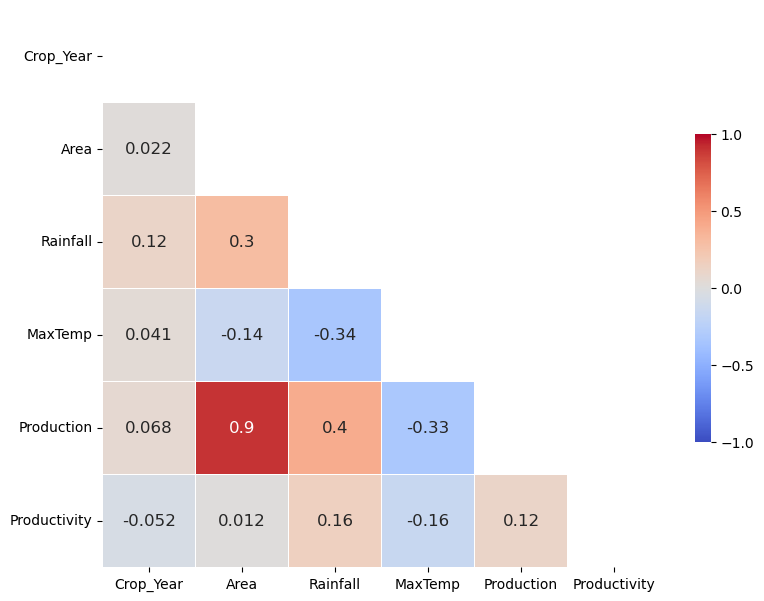

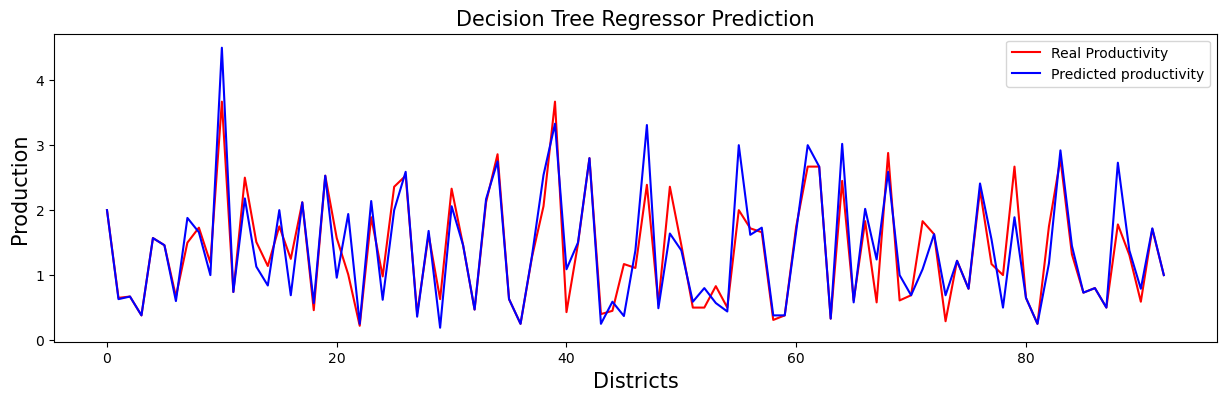

In [195]:
# Visualising the results
plt.figure(figsize=(15,4))
plt.plot(y_test, color = 'red', label = 'Real Productivity')
plt.plot(y_pred_DT, color = 'blue', label = 'Predicted productivity')
plt.title('Decision Tree Regressor Prediction',fontsize=15)
plt.xlabel('Districts',fontsize=15)
plt.ylabel('Production',fontsize=15)
plt.legend()
plt.show()

In [197]:
from sklearn.neighbors import KNeighborsRegressor


In [198]:
#Nearest Neighbour=2
neigh_2 = KNeighborsRegressor(n_neighbors=3)
neigh_2.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [199]:
y_pred_kn_2=neigh_2.predict(X_test)

In [200]:
KNN_2=pd.DataFrame({'Actual':y_test,'Predicted':y_pred_kn_2})
KNN_2

,Actual,Predicted
0,2.0,2.323333
1,0.65,0.636667
2,0.67,0.67
3,0.38,0.373333
4,1.57,1.61
...,...,...
88,1.78,1.716667
89,1.31,1.346667
90,0.59,0.61
91,1.71,1.703333


In [201]:
print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred_kn_2))
print('Mean squared Error:',mean_squared_error(y_test,y_pred_kn_2))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,y_pred_kn_2)))
#print('R2_Score:',r2_score(y_test, y_pred_kn_2))

Mean Absolute Error: 0.11204301075268812
Mean squared Error: 0.03757873357228195
Root Mean Squared Error: 0.19385234992715963


In [202]:
knn2_r2_score= r2_score(y_test, y_pred_kn_2)
knn2_r2_score

0.9464074155346962

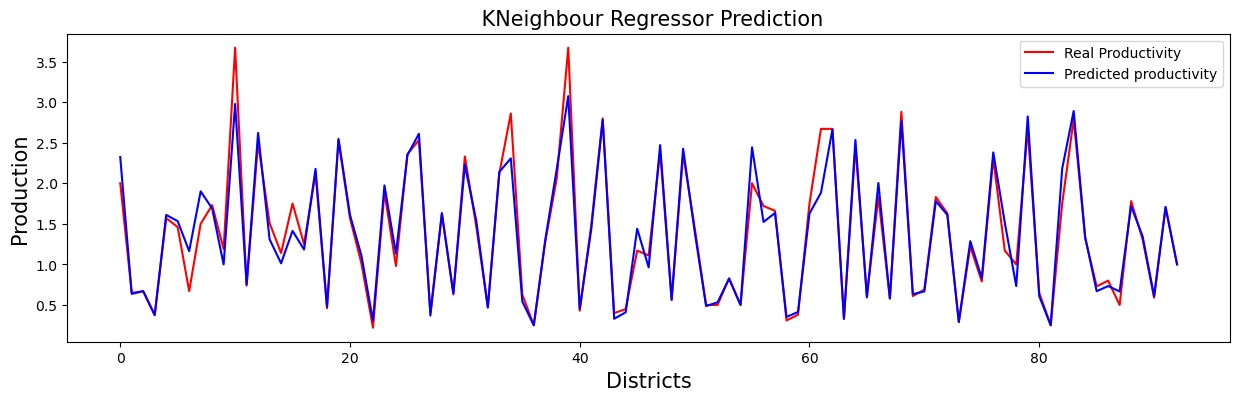

In [203]:
#Visualising the results
plt.figure(figsize=(15,4))
plt.plot(y_test, color = 'red', label = 'Real Productivity')
plt.plot(y_pred_kn_2, color = 'blue', label = 'Predicted productivity')
plt.title(' KNeighbour Regressor Prediction',fontsize=15)
plt.xlabel('Districts',fontsize=15)
plt.ylabel('Production',fontsize=15)
plt.legend()
plt.show()

### RandomForest Regressor

In [204]:
from sklearn.ensemble import RandomForestRegressor

In [205]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 46)
rf.fit(X_train, y_train);

In [206]:
rf_pred=rf.predict(X_test)
print('Mean squared Error:',mean_squared_error(y_test,rf_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,rf_pred)))
#print('R2_Score:',r2_score(y_test,rf_pred))

Mean squared Error: 0.2219226465129027
Root Mean Squared Error: 0.47108666560719237


In [207]:
randomforest_r2_score=r2_score(y_test,rf_pred)
randomforest_r2_score

0.6835069453543516

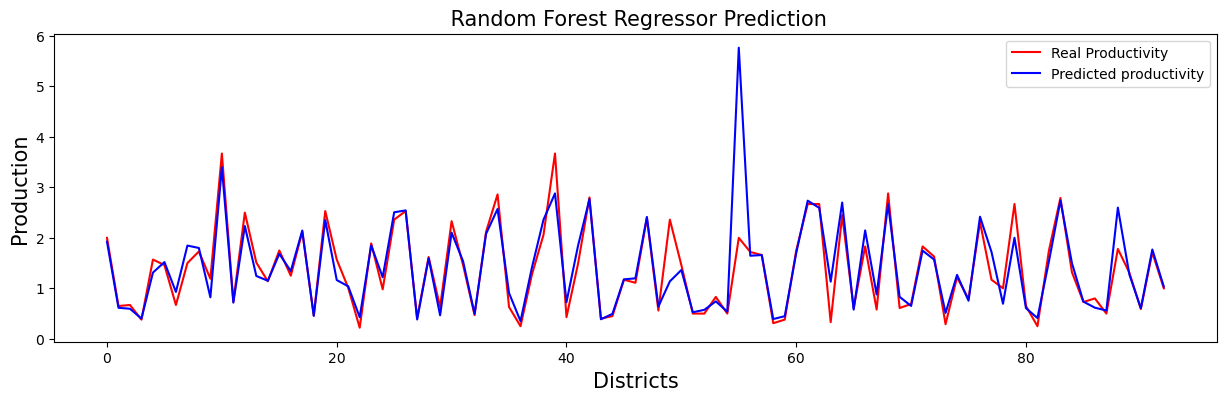

In [208]:
#Visualising the results
plt.figure(figsize=(15,4))
plt.plot(y_test, color = 'red', label = 'Real Productivity')
plt.plot(rf_pred, color = 'blue', label = 'Predicted productivity')
plt.title(' Random Forest Regressor Prediction',fontsize=15)
plt.xlabel('Districts',fontsize=15)
plt.ylabel('Production',fontsize=15)
plt.legend()
plt.show()

In [209]:
Regressors=['RandomForest','DesicionTree','KNeighbour']

In [210]:
R2Score=[randomforest_r2_score,decision_r2_score,knn2_r2_score]

C:\Users\HP\AppData\Local\Temp\ipykernel_14212\2059932953.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


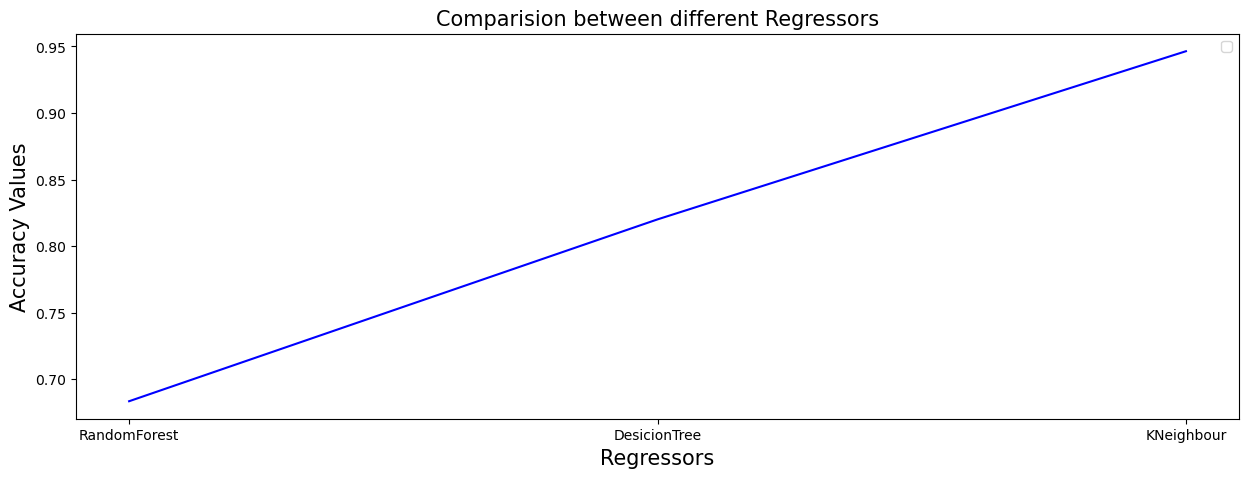

In [211]:
plt.figure(figsize=(15,5))
plt.plot(Regressors,R2Score, color = 'Blue')

plt.title('Comparision between different Regressors',fontsize=15)
plt.xlabel('Regressors',fontsize=15)
plt.ylabel('Accuracy Values',fontsize=15)
plt.legend()
plt.show()
